In [3]:
#import các thư viện cần thiết 
import numpy as np 
import pandas as pd
import heapq

In [ ]:
class Graph: 
    def __init__(self):
        """Khởi tạo đồ thị với danh sách kề rỗng"""
        self.graph = {}
    
    def load_csv (self, filename):
        """
        Đọc đồ thị từ file csv
        Mỗi dòng bao gồm (v_from, v_to, weight)

        """
        with open(filename, mode = 'r') as file: 
            graph_csv = pd.read_csv(file)
            next(graph_csv) #Bỏ qua dòng tiêu đề (v_from, v_to, weight)
            for row in graph_csv:
                v_from, v_to, weight = int(row[0]), int(row[1]), int(row[2])

                #Đồ thị VÔ HƯỚNG nên khi thêm cạnh vào đồ thị thì phải thêm cả HAI CHIỀU
                self.add_edge(v_from, v_to, weight)
    
    def add_edge (self, v_from, v_to, weight):
        """ 
        Thêm cạnh vào danh sách kề của đồ thị 
        Nếu đỉnh chưa tồn tại trong danh sách kề thì tạo một danh sách kề mới
        """
        if v_from not in self.graph:
            self.graph[v_from] = []

        if v_to not in self.graph:
            self.graph[v_to] = []
        
        #Thêm cạnh HAI CHIỀU vì là đồ thị VÔ HƯỚNG 
        self.graph[v_from].append((v_to, weight))
        self.graph[v_to].append((v_from, weight))
    
    def Dijkstra(self, source):
        """ 
        Tìm đường đi ngắn nhất từ đỉnh bắt đầu (đỉnh nguồn) đến các đỉnh khác
        
        Trả về:
        - dist: Dictionary lưu khoảng cách ngắn nhất từ nguồn đến từng đỉnh.
        - prev: Dictionary lưu đỉnh trước đó trên đường đi ngắn nhất.
        """
        
        dist = {v: np.inf for v in self.graph}   #Infinity
        prev = {v: None for v in self.graph}     #Undefined
        dist[source] = 0

        #Hàng đợi ưu tiên lấy đỉnh có khoảng cách nhỏ nhất
        pri_queue = [(0, source)] #(Khoảng cách, đỉnh)

        while pri_queue:
            current_dist, v_from = heapq.heappop(pri_queue)

            #Bỏ qua nếu khoảng cách không tối ưu


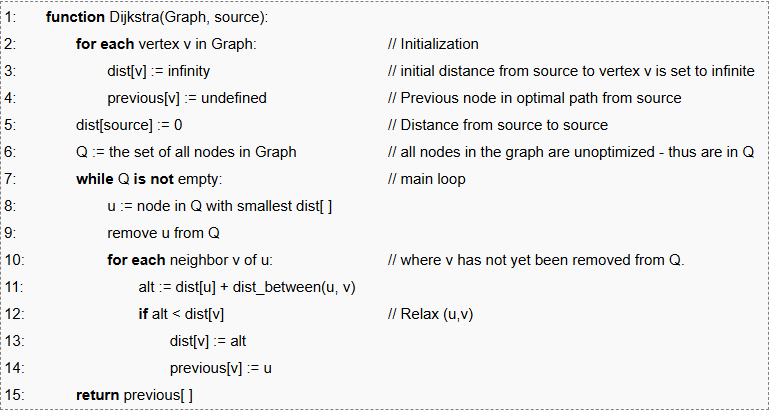

In [ ]:
'C:\Users\ASUS\Documents\GitHub\Final-LTPTDL\Graph.csv'